In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
path = "~/Documents/Career Foundry/specialization/Data Sets"

In [3]:
raw = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [4]:
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [8]:
# Convert from wide format to long format using melt
raw_long = raw.melt(id_vars=['DATE', 'MONTH'], 
                 var_name='city_metric', 
                 value_name='value')

# Split city name from variables and pivot them into new columns
raw_long[['city', 'metric']] = raw_long['city_metric'].str.split('_', n=1, expand=True)
raw_long = raw_long.drop('city_metric', axis=1).pivot_table(
   index=['DATE', 'MONTH', 'city'], 
   columns='metric', 
   values='value', 
   aggfunc='first'
).reset_index()

In [9]:
climate_unscaled = raw_long[~raw_long['city'].isin(['GDANSK','ROMA','TOURS'])].copy()

In [10]:
climate_unscaled = climate_unscaled[['DATE','MONTH','city','precipitation','sunshine','temp_max']]

In [11]:
# Convert from wide format to long format using melt
ans_long = answers.melt(id_vars=['DATE'], 
                 var_name='city_metric', 
                 value_name='value')

# Split city name from variables and pivot them into new columns
ans_long[['city', 'metric']] = ans_long['city_metric'].str.split('_', n=1, expand=True)
ans_long = ans_long.drop('city_metric', axis=1).pivot_table(
   index=['DATE', 'city'], 
   columns='metric', 
   values='value', 
   aggfunc='first'
).reset_index()

In [12]:
climate_unscaled = climate_unscaled.sort_values(['DATE','city']).reset_index(drop=True)
pleasant = ans_long.sort_values(['DATE','city']).reset_index(drop=True)

In [14]:
#Create an 'X' matrix by dropping the unneeded columns.
X = climate_unscaled.drop(['DATE', 'MONTH', 'city'], axis=1)
y = pleasant.pleasant_weather

In [15]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(258187, 3)
(86063, 3)
(258187,)
(86063,)


In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=50, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=50)

In [25]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9924783199773808
0.9929935047581423


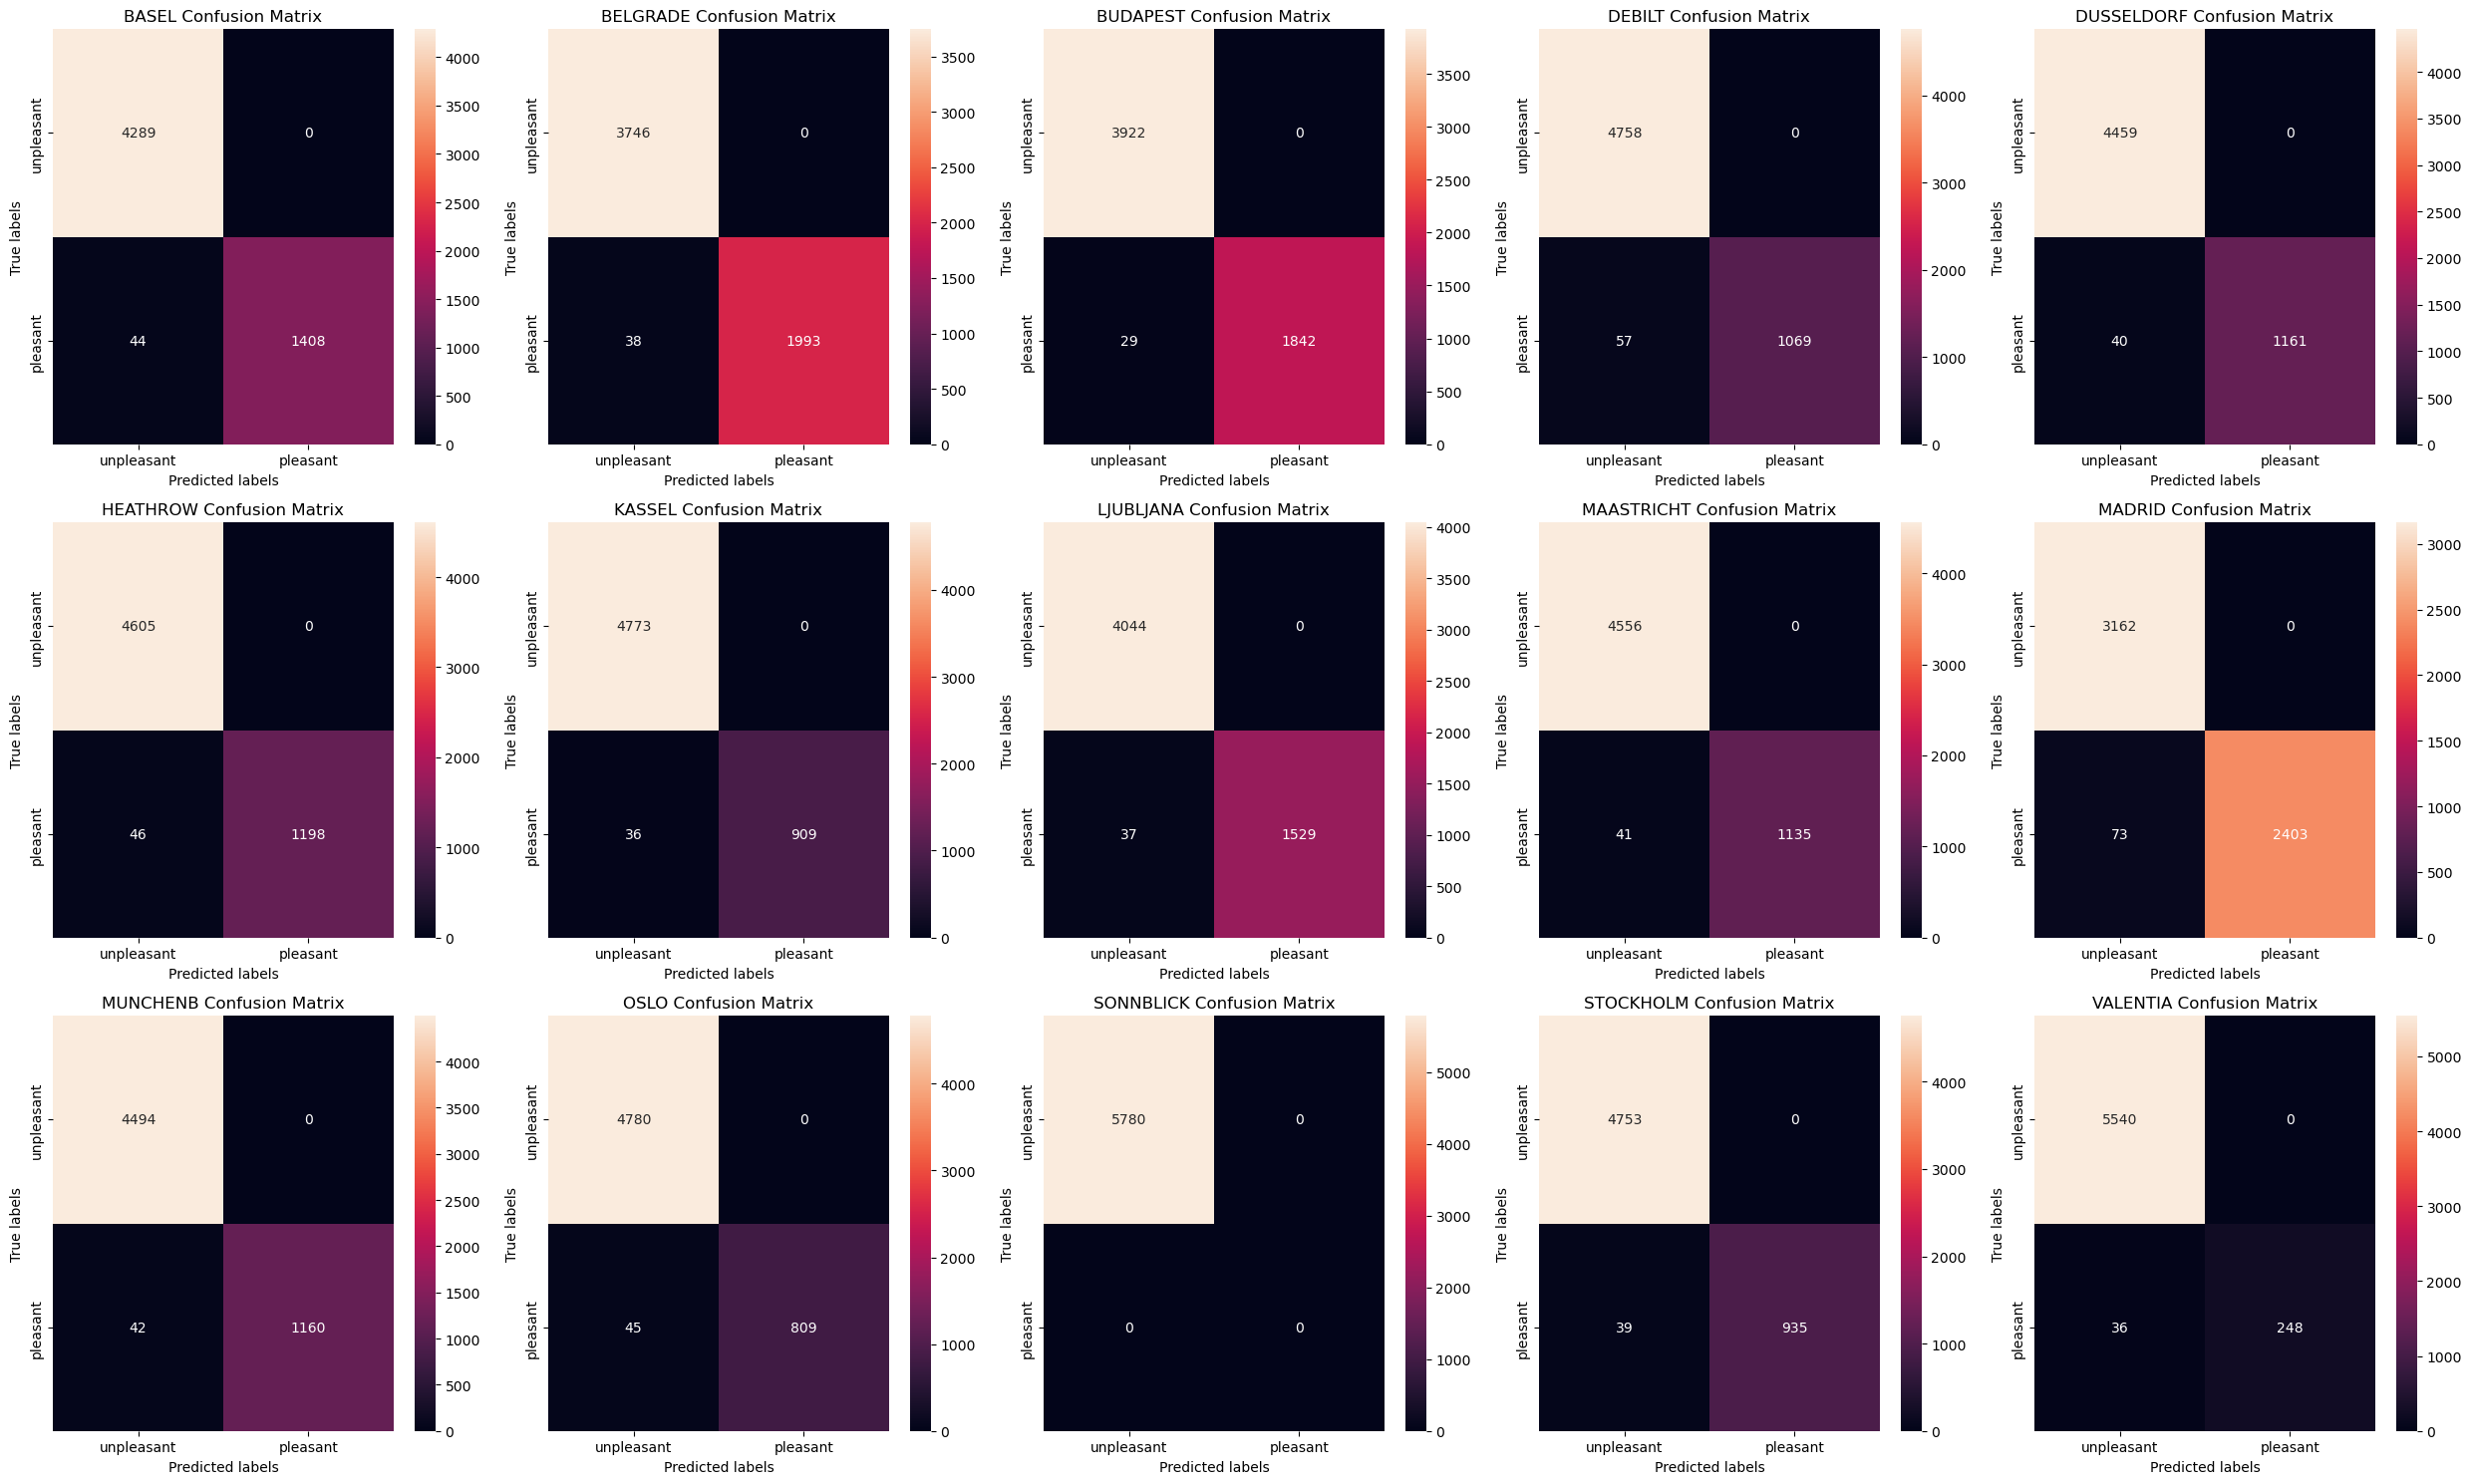

In [26]:
city_test = pleasant.loc[y_test.index, 'city']
cities = city_test.unique()
cities.sort()

figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['unpleasant', 'pleasant']   
count = 0

for i in range(3):
    for j in range(5):
        if count < len(cities):
            city_name = cities[count]
            
            # Filter data for current city
            city_mask = city_test == city_name
            y_true_city = y_test[city_mask]
            y_pred_city = y_pred_test[city_mask]
            
            # Create confusion matrix with explicit labels to ensure 2x2 matrix
            cm = confusion_matrix(y_true_city, y_pred_city, labels=[0, 1])
            
            # Plot heatmap
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j], 
                       xticklabels=labels, yticklabels=labels)
            
            # Labels, title and ticks
            ax[i,j].set_xlabel('Predicted labels')
            ax[i,j].set_ylabel('True labels')
            ax[i,j].set_title(f'{city_name} Confusion Matrix')
            
        else:
            # Hide unused subplots if fewer than 15 cities
            ax[i,j].set_visible(False)
            
        count += 1

plt.tight_layout()
plt.savefig(os.path.join(path, 'ann_confusion_matrices_1.png'))
plt.show()

In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 5), max_iter=50, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

/home/scruffy/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5, 5), max_iter=50)

In [29]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9987644614174997
0.9986521501690622


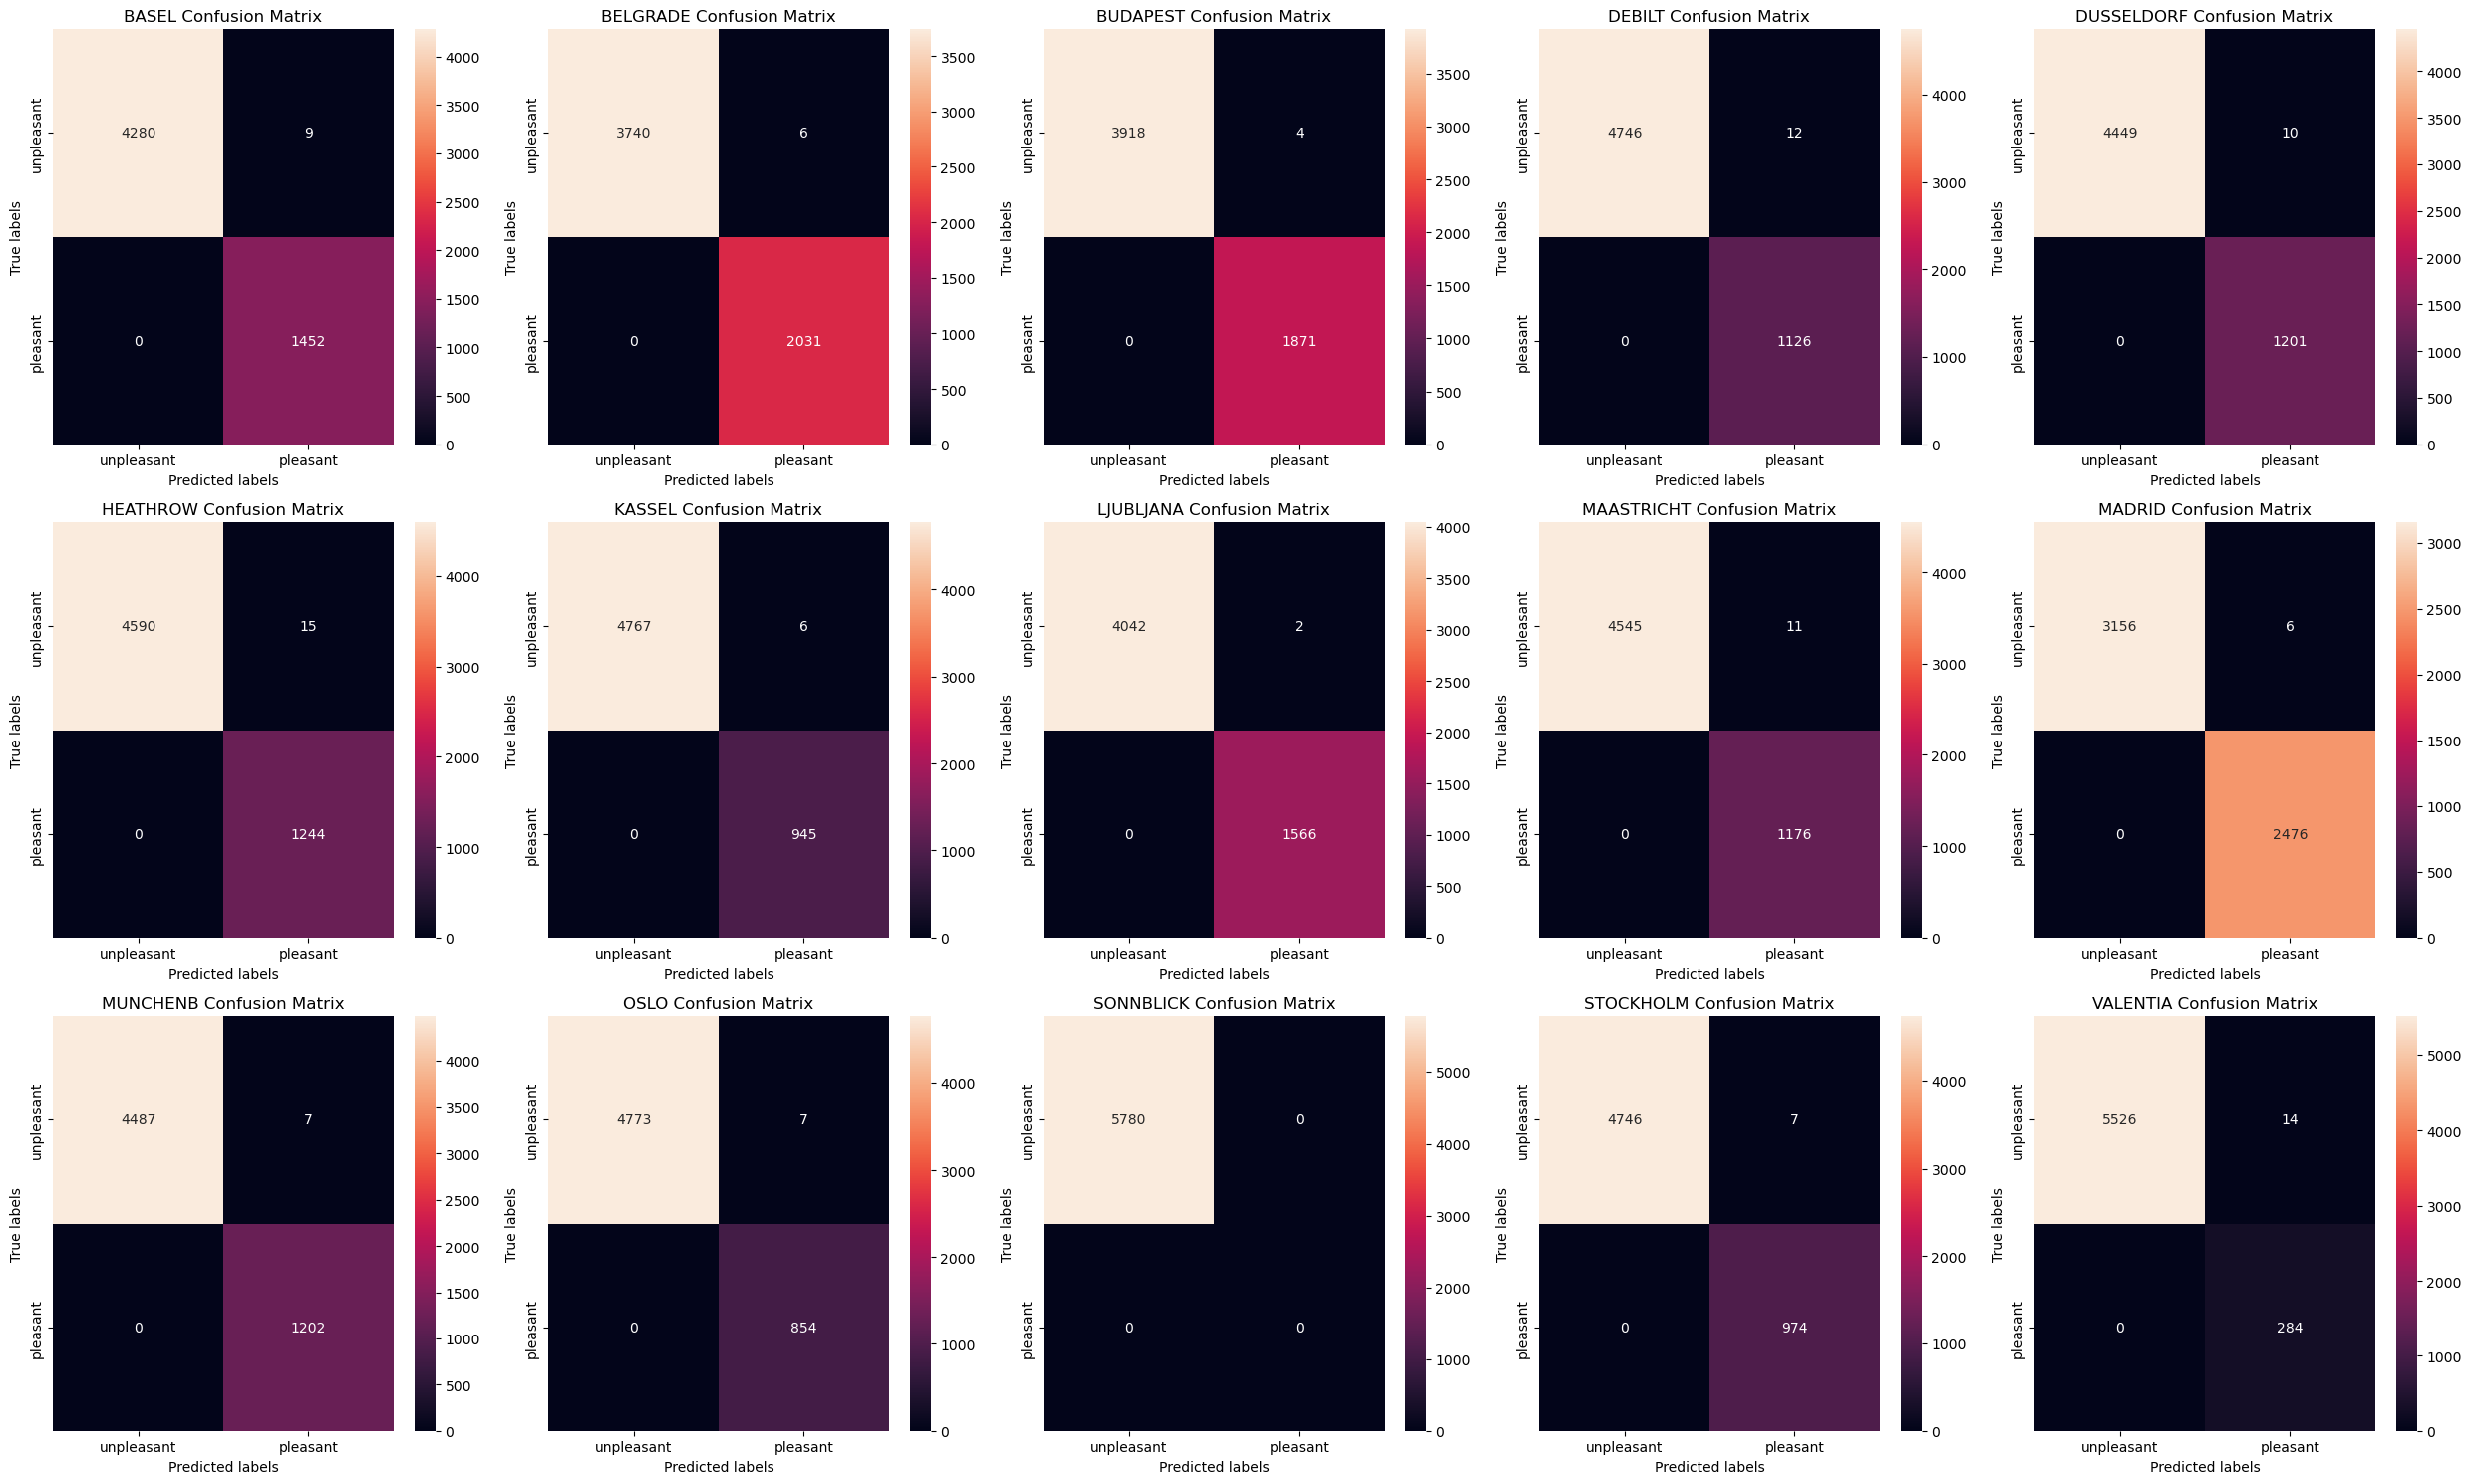

In [31]:
city_test = pleasant.loc[y_test.index, 'city']
cities = city_test.unique()
cities.sort()

figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['unpleasant', 'pleasant']   
count = 0

for i in range(3):
    for j in range(5):
        if count < len(cities):
            city_name = cities[count]
            
            # Filter data for current city
            city_mask = city_test == city_name
            y_true_city = y_test[city_mask]
            y_pred_city = y_pred_test[city_mask]
            
            # Create confusion matrix with explicit labels to ensure 2x2 matrix
            cm = confusion_matrix(y_true_city, y_pred_city, labels=[0, 1])
            
            # Plot heatmap
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j], 
                       xticklabels=labels, yticklabels=labels)
            
            # Labels, title and ticks
            ax[i,j].set_xlabel('Predicted labels')
            ax[i,j].set_ylabel('True labels')
            ax[i,j].set_title(f'{city_name} Confusion Matrix')
            
        else:
            # Hide unused subplots if fewer than 15 cities
            ax[i,j].set_visible(False)
            
        count += 1

plt.tight_layout()
plt.savefig(os.path.join(path, 'ann_confusion_matrices_2.png'))
plt.show()

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=500)

In [33]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9998721856638793
0.9998605672588685


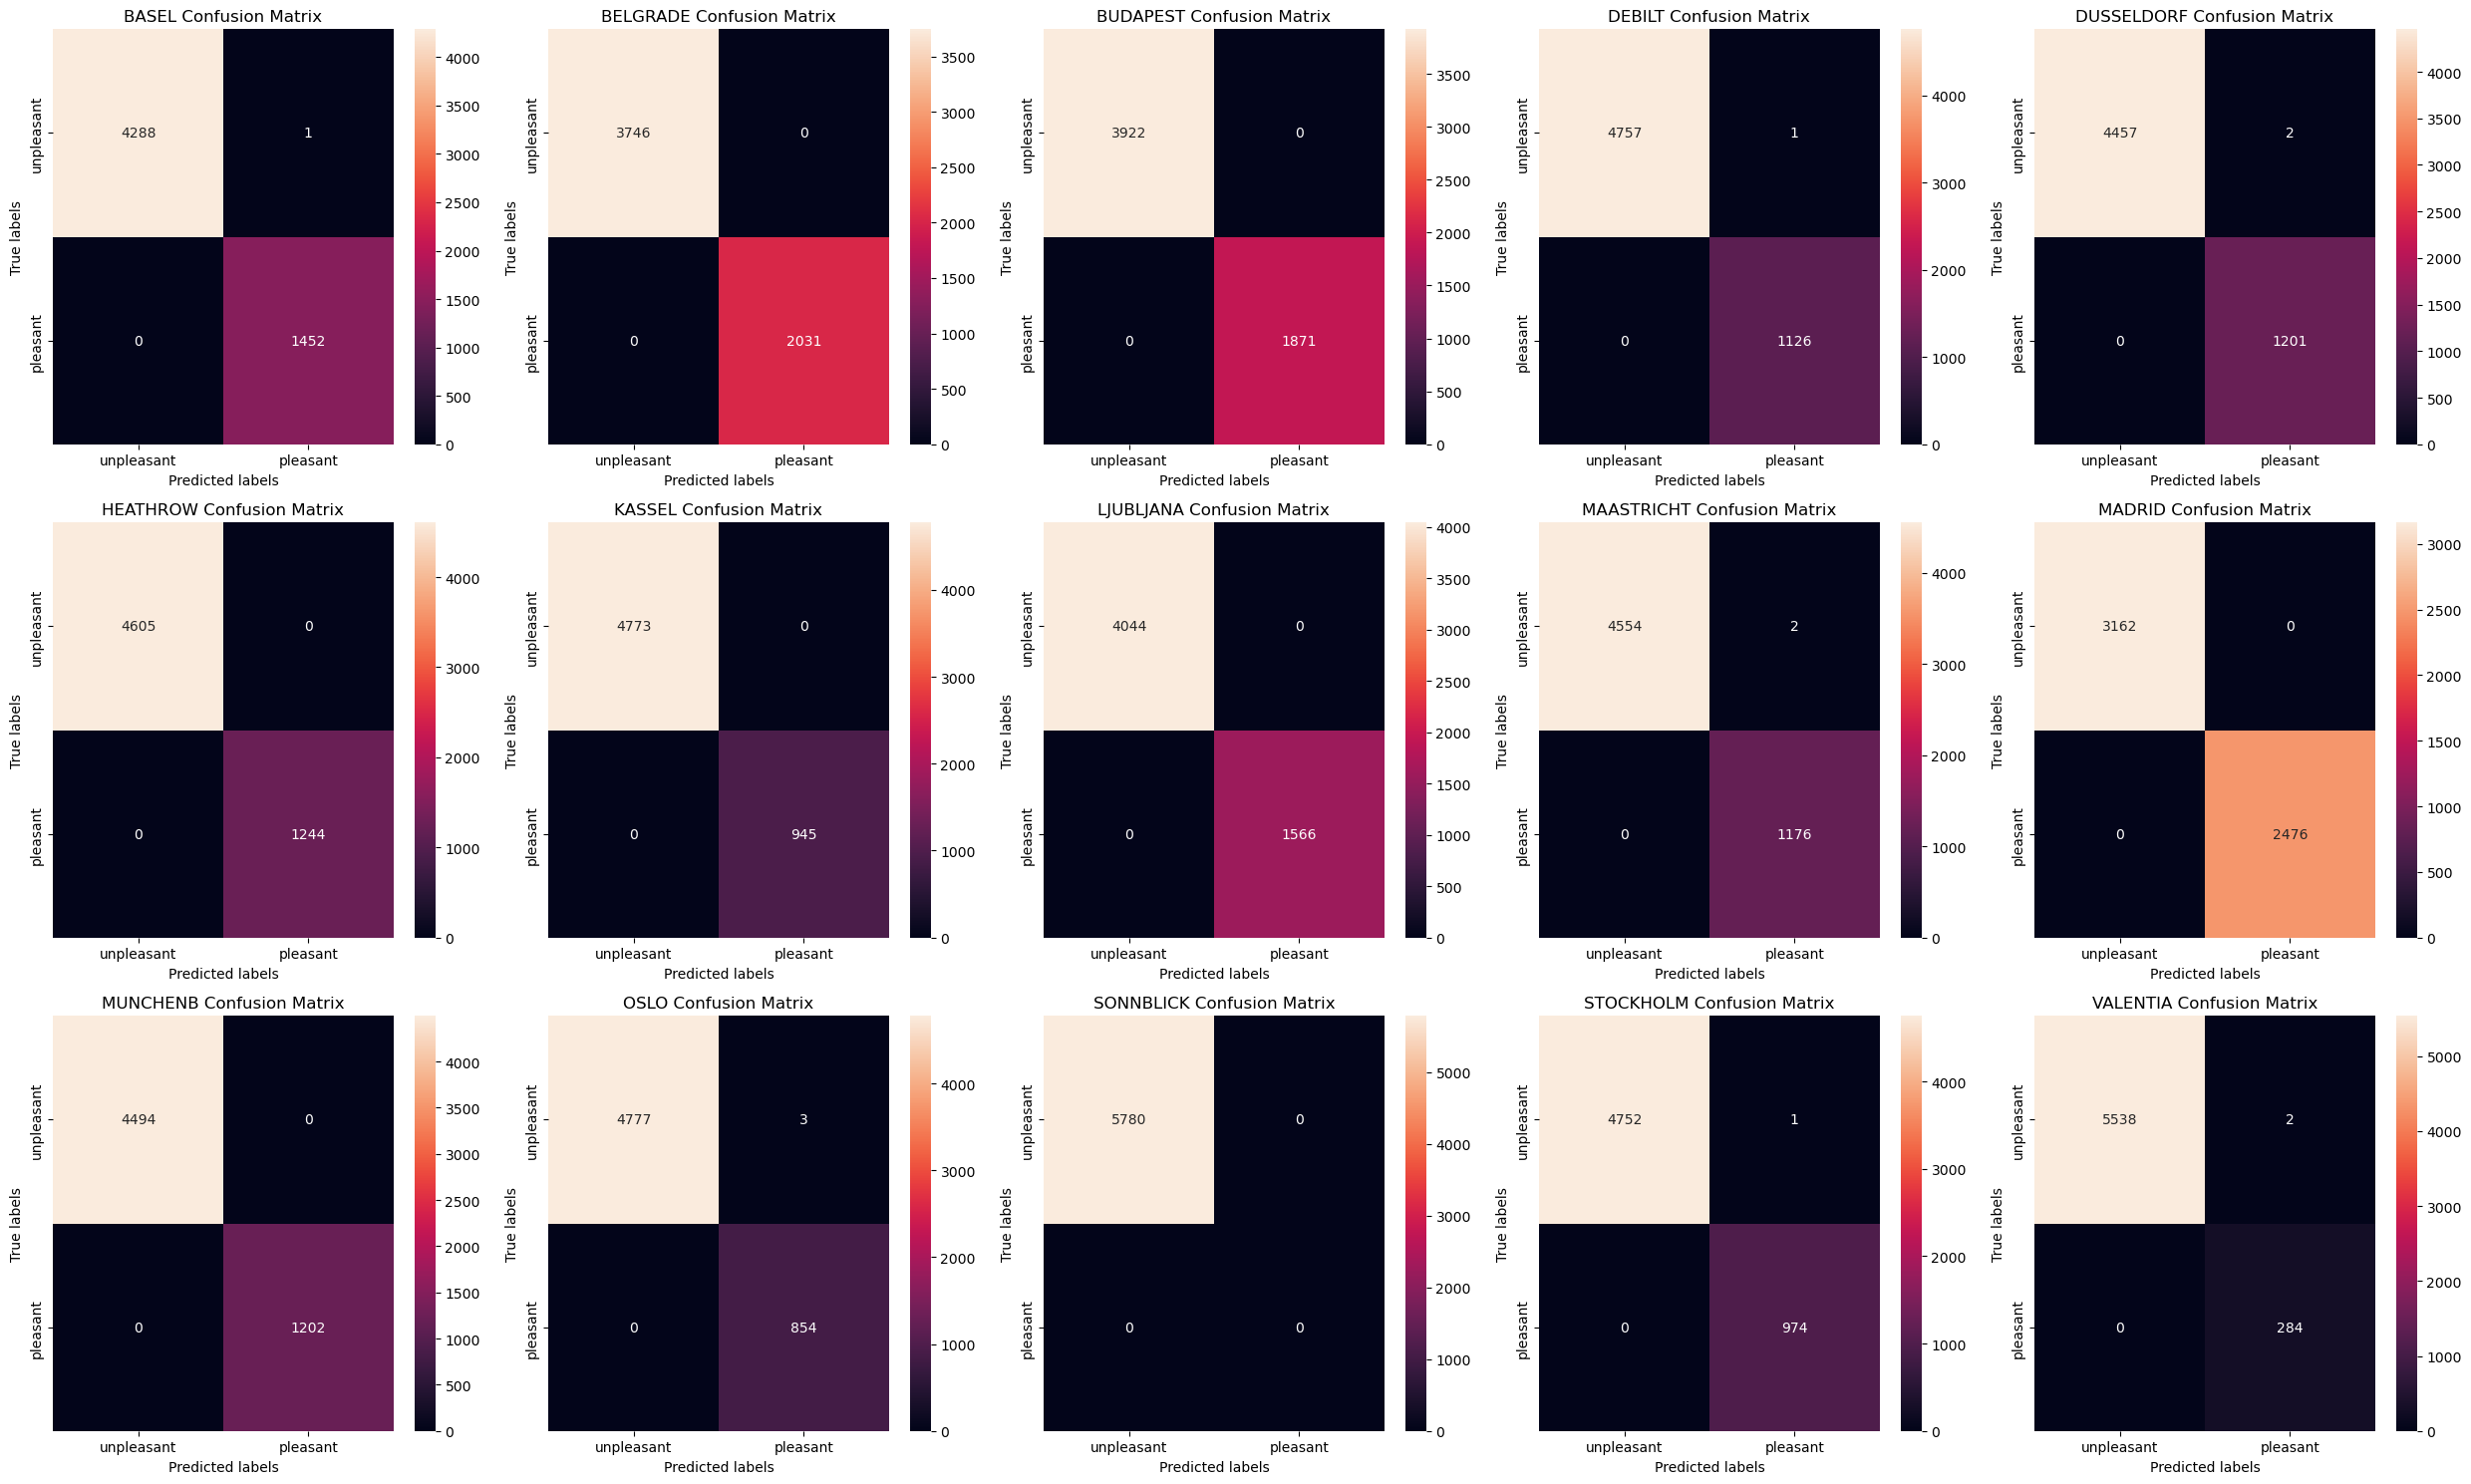

In [34]:
city_test = pleasant.loc[y_test.index, 'city']
cities = city_test.unique()
cities.sort()

figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['unpleasant', 'pleasant']   
count = 0

for i in range(3):
    for j in range(5):
        if count < len(cities):
            city_name = cities[count]
            
            # Filter data for current city
            city_mask = city_test == city_name
            y_true_city = y_test[city_mask]
            y_pred_city = y_pred_test[city_mask]
            
            # Create confusion matrix with explicit labels to ensure 2x2 matrix
            cm = confusion_matrix(y_true_city, y_pred_city, labels=[0, 1])
            
            # Plot heatmap
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j], 
                       xticklabels=labels, yticklabels=labels)
            
            # Labels, title and ticks
            ax[i,j].set_xlabel('Predicted labels')
            ax[i,j].set_ylabel('True labels')
            ax[i,j].set_title(f'{city_name} Confusion Matrix')
            
        else:
            # Hide unused subplots if fewer than 15 cities
            ax[i,j].set_visible(False)
            
        count += 1

plt.tight_layout()
plt.savefig(os.path.join(path, 'ann_confusion_matrices_3.png'))
plt.show()

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [36]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9995390937576253
0.9996514181471713


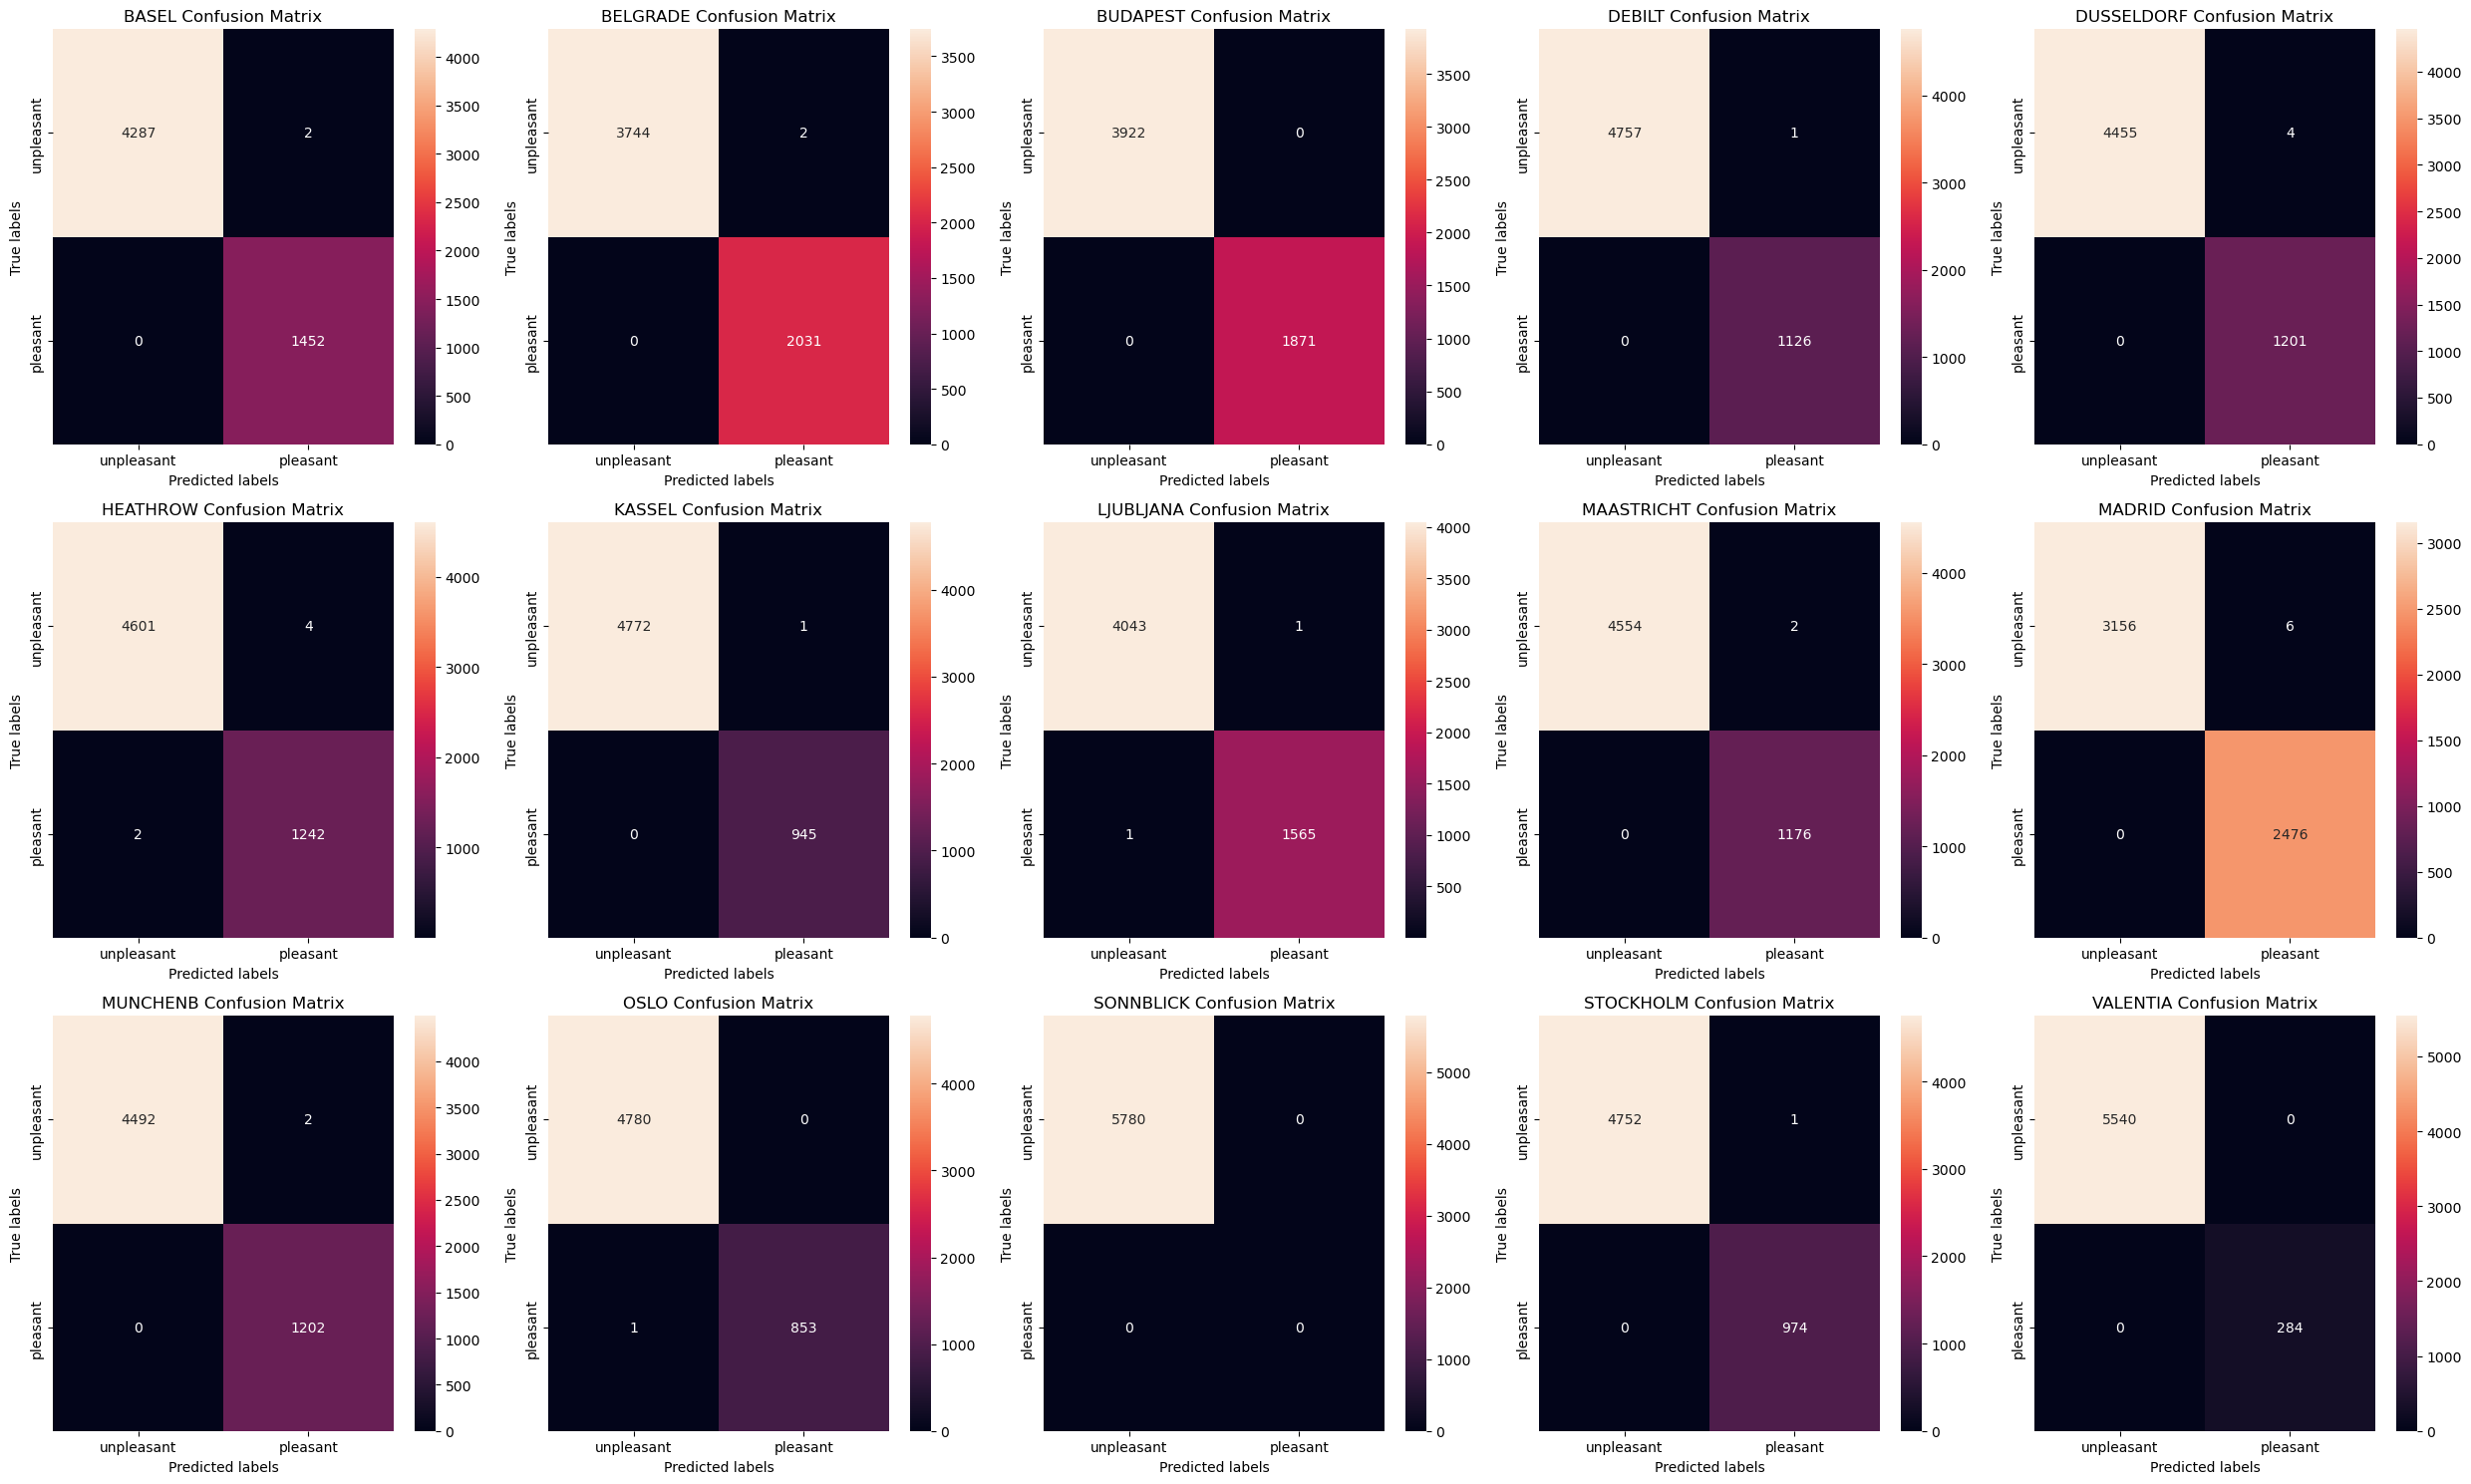

In [37]:
city_test = pleasant.loc[y_test.index, 'city']
cities = city_test.unique()
cities.sort()

figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['unpleasant', 'pleasant']   
count = 0

for i in range(3):
    for j in range(5):
        if count < len(cities):
            city_name = cities[count]
            
            # Filter data for current city
            city_mask = city_test == city_name
            y_true_city = y_test[city_mask]
            y_pred_city = y_pred_test[city_mask]
            
            # Create confusion matrix with explicit labels to ensure 2x2 matrix
            cm = confusion_matrix(y_true_city, y_pred_city, labels=[0, 1])
            
            # Plot heatmap
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j], 
                       xticklabels=labels, yticklabels=labels)
            
            # Labels, title and ticks
            ax[i,j].set_xlabel('Predicted labels')
            ax[i,j].set_ylabel('True labels')
            ax[i,j].set_title(f'{city_name} Confusion Matrix')
            
        else:
            # Hide unused subplots if fewer than 15 cities
            ax[i,j].set_visible(False)
            
        count += 1

plt.tight_layout()
plt.savefig(os.path.join(path, 'ann_confusion_matrices_4.png'))
plt.show()

In [38]:
# Create scaler object
scaler = StandardScaler()

In [60]:
# Identify columns to exclude from scaling
categorical_cols = ['DATE', 'MONTH', 'city']
numeric_cols = climate_unscaled.select_dtypes(include=[np.number]).columns.difference(categorical_cols)

# Apply StandardScaler only to numeric columns
climate_scaled = climate_unscaled.copy()
climate_scaled[numeric_cols] = scaler.fit_transform(climate_scaled[numeric_cols])

In [61]:
#Create an 'X' matrix by dropping the unneeded columns.
X = climate_scaled.drop(['DATE', 'MONTH', 'city'], axis=1)
y = pleasant.pleasant_weather

In [62]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(258187, 3)
(86063, 3)
(258187,)
(86063,)


In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=50, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=50)

In [65]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9999806341914969
0.9999883806049057


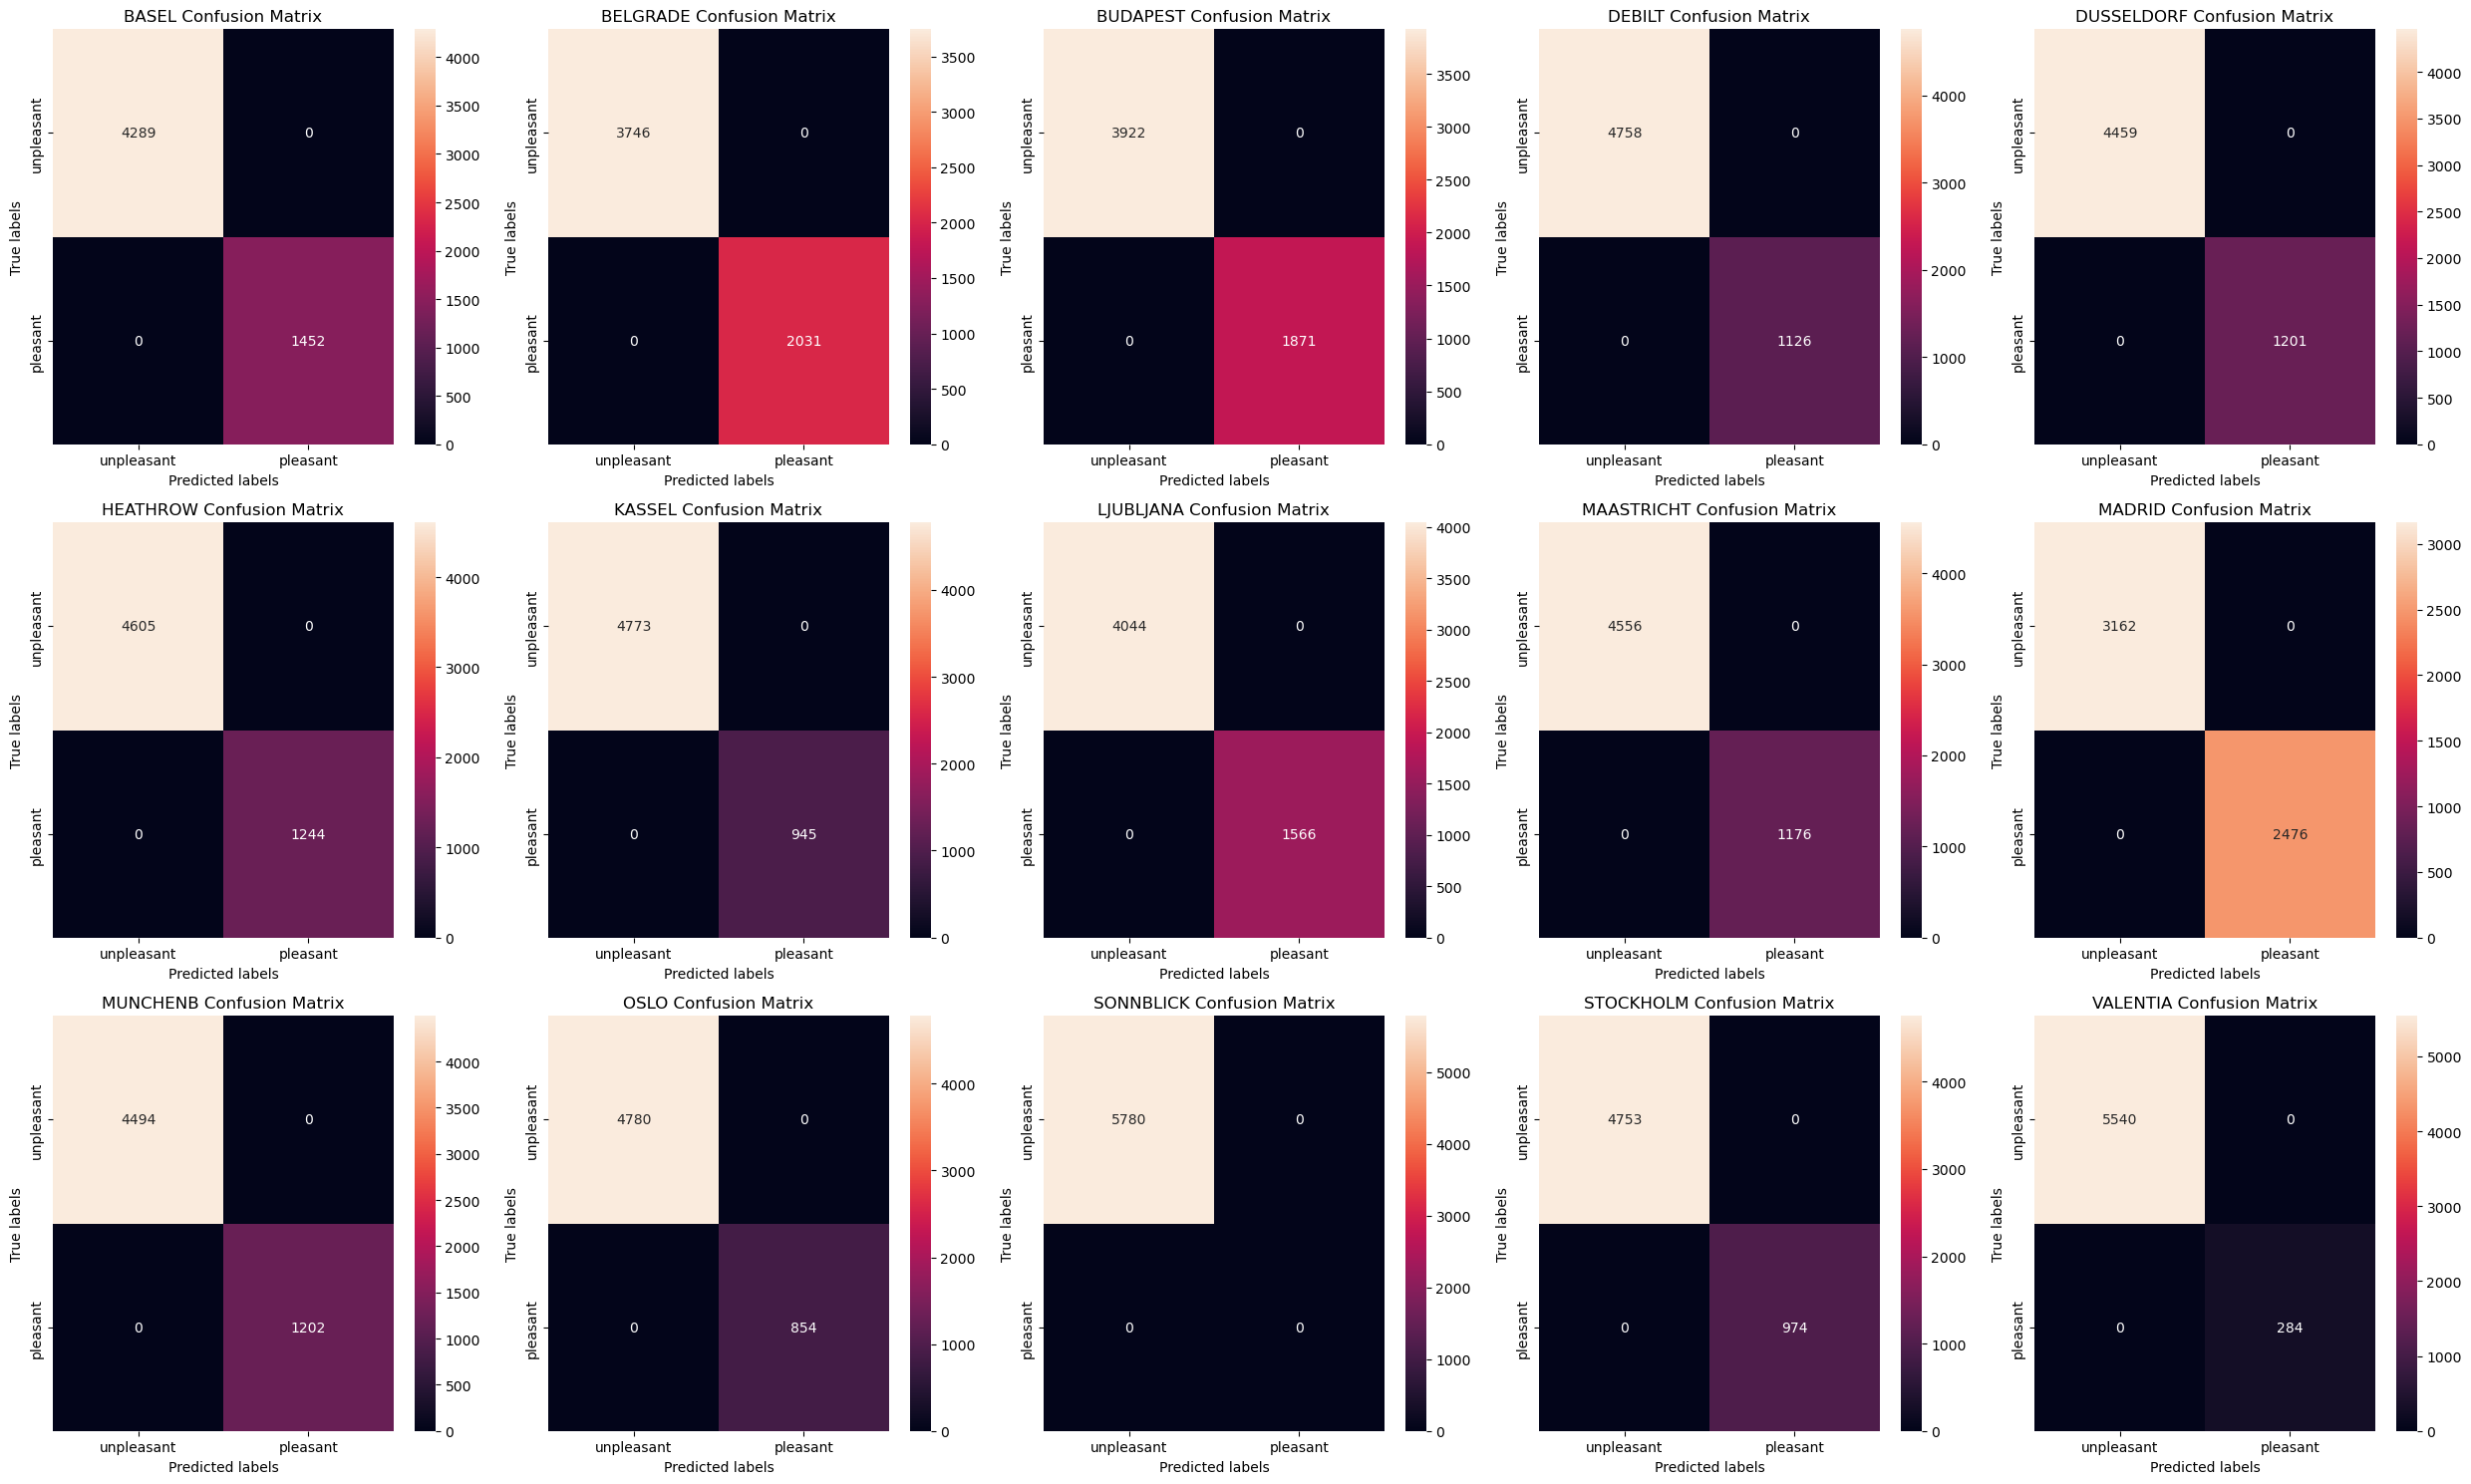

In [59]:
city_test = pleasant.loc[y_test.index, 'city']
cities = city_test.unique()
cities.sort()

figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['unpleasant', 'pleasant']   
count = 0

for i in range(3):
    for j in range(5):
        if count < len(cities):
            city_name = cities[count]
            
            # Filter data for current city
            city_mask = city_test == city_name
            y_true_city = y_test[city_mask]
            y_pred_city = y_pred_test[city_mask]
            
            # Create confusion matrix with explicit labels to ensure 2x2 matrix
            cm = confusion_matrix(y_true_city, y_pred_city, labels=[0, 1])
            
            # Plot heatmap
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j], 
                       xticklabels=labels, yticklabels=labels)
            
            # Labels, title and ticks
            ax[i,j].set_xlabel('Predicted labels')
            ax[i,j].set_ylabel('True labels')
            ax[i,j].set_title(f'{city_name} Confusion Matrix')
            
        else:
            # Hide unused subplots if fewer than 15 cities
            ax[i,j].set_visible(False)
            
        count += 1

plt.tight_layout()
#plt.savefig(os.path.join(path, 'ann_scaled_confusion_matrices.png'))
plt.show()